## Its is a project of analyzing the no. of people who leave a telecom company. here we have a Churn dataset of a company we have to do the descriptive analysis to find out the INSIGHTS about the people who are churning.

### Steps for the analysis
1. load dataset
2. datacleaning -> a. handling missing value, b. handling invalid data and outliers.
3. perfornming univariate, bvarite,multivarite analysis on both cat. and numeric columns seprately.

In [1]:
# Importing the nesseary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# loading the dataset
df = pd.read_csv("D:\CODDING\Python\Programs\Python_Programs\Jupyter Notebooks\datasets\CustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Once we Load the dataset oour first work is to get a overview of dataset like shape, dtype, columns

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
# To check the dtypes of the columns we have two ways using dtypes, info() method
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Total chagers col have numeric values but its dtype is object so we have to change it

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Observations:
1. Almost 75% people have tenuer less than 55months
2. Out of 7043 persons only 25% are spending more than 90$

In [8]:
# Our target varible is Churn,let's get a overview of it.
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### Almost 26% people had left the company

Text(0.5, 1.0, 'Count of Churn Customers')

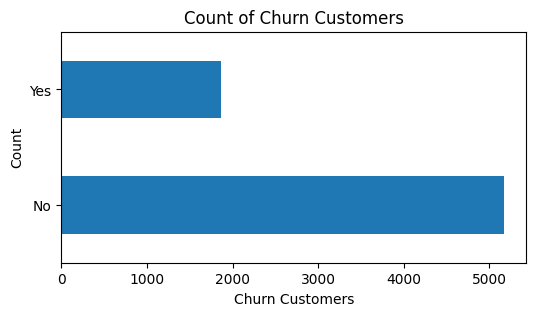

In [9]:
# Plotting a graph of Churn col to get a graphical representation
df['Churn'].value_counts().plot(kind = 'barh', figsize = (6, 3))
plt.xlabel("Churn Customers")
plt.ylabel("Count")
plt.title("Count of Churn Customers")

In [10]:
# Now we have an overview of the dataset and also some basic insights like percentage of churn people, Avg tenure of people, Abg monthly charges of people

### Data Cleaning

In [11]:
# Now lets move on to data cleaing part

In [12]:
new_df = df.copy() # We make a copy of our dataset so that we can experiment thorugh the coupy dataset and our original remain untouched

In [13]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
new_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# but our totalcharges col is object and its contain numeric data

In [16]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors = "coerce")

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
new_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# Now we have 11 null values, if we do not change the dtype of col then we get this info,, the reason is pandas read nullvalues as a string.

In [20]:
# To calculate the % of null values
new_df['TotalCharges'].isna().sum() / len(new_df) * 100

0.1561834445548772

In [21]:
# Only 0.15% null values are there, we can drop these values as they are very less in no.
new_df.dropna(inplace = True)

In [22]:
new_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

#### Have 17 object type cols and 4 numeric cols


In [24]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
#Creating bins for the tenure col. because in later analysis it is produceing conflict.

In [26]:
print(new_df['tenure'].max())

72


In [27]:
labels = ['{0}- {1}'.format(i, i+11) for i in range(1,72, 12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [28]:
new_df['tenure_group'].value_counts()

tenure_group
1- 12     2175
61- 72    1407
13- 24    1024
25- 36     832
49- 60     832
37- 48     762
Name: count, dtype: int64

In [29]:
new_df.drop('tenure', axis = 1, inplace = True)

In [30]:
new_df

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1- 12
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25- 36
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1- 12
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37- 48
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1- 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13- 24
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61- 72
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1- 12
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1- 12


In [31]:
# Irrelevant col -> customerID so drop it.
new_df.drop(columns = "customerID", axis = 1, inplace = True)

In [32]:
# The SeniorCitizen col have values 0,1 which implies No, yes. So we can map 0 with No, 1 with Yes
dict = {
    0 : "No", 
    1 : "Yes"
}
new_df['SeniorCitizen'] = new_df['SeniorCitizen'].map(dict)

In [33]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1- 12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25- 36
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1- 12
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37- 48
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1- 12


## Data Exploration / Analysis 

In [34]:
for col in new_df:
    print(new_df[col].value_counts())

gender
Male      3549
Female    3483
Name: count, dtype: int64
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Nam

### Univariate analysis

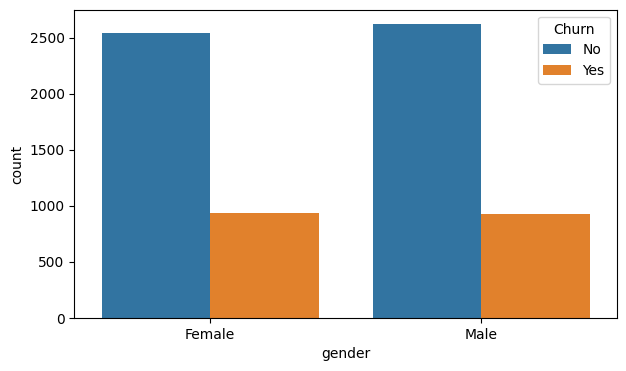

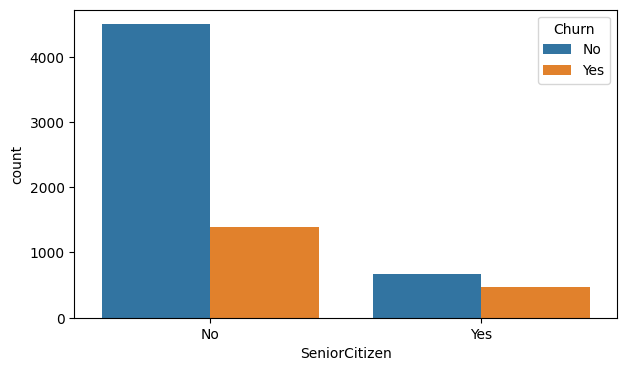

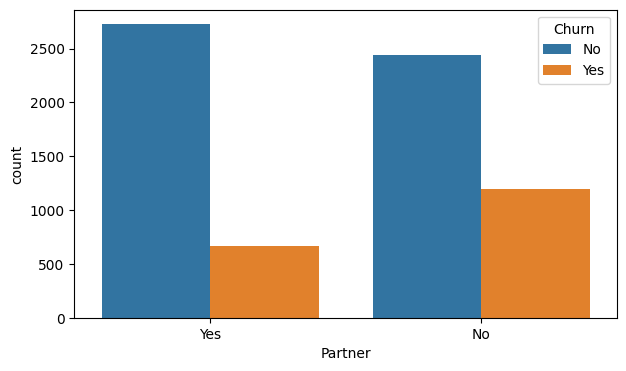

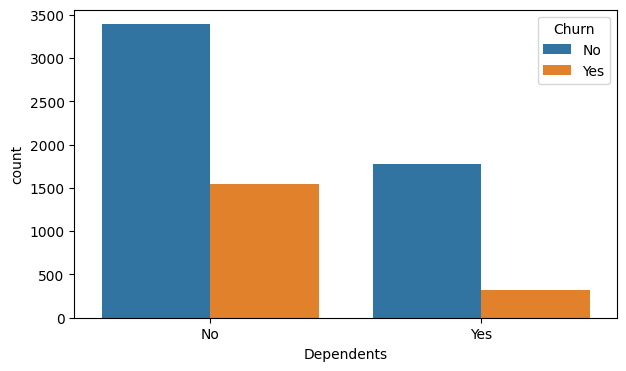

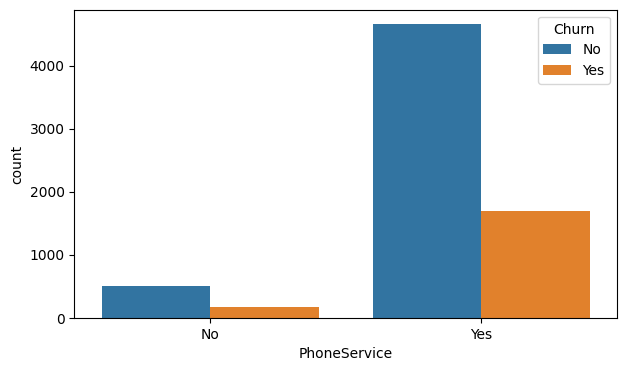

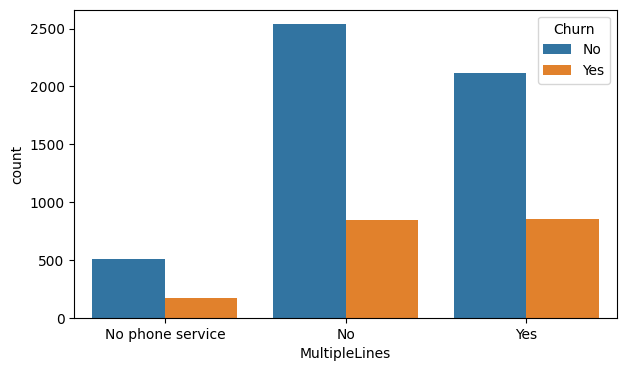

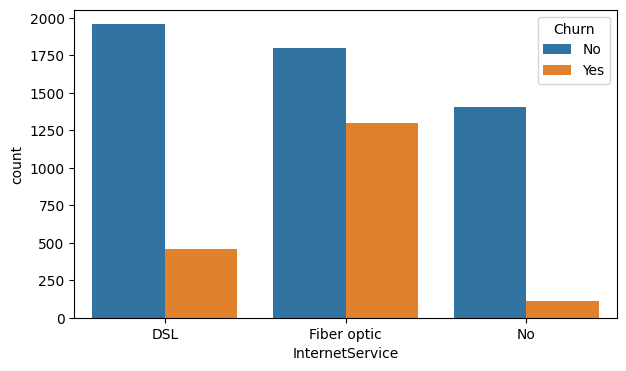

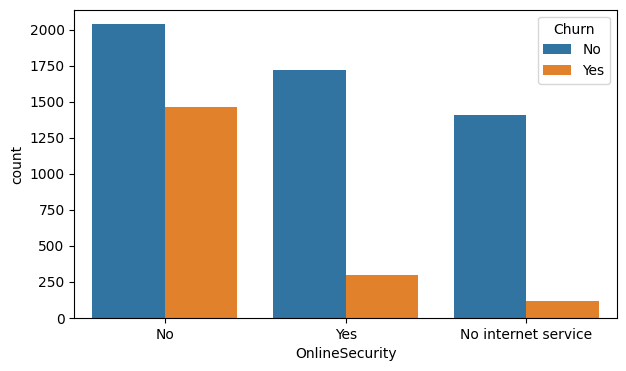

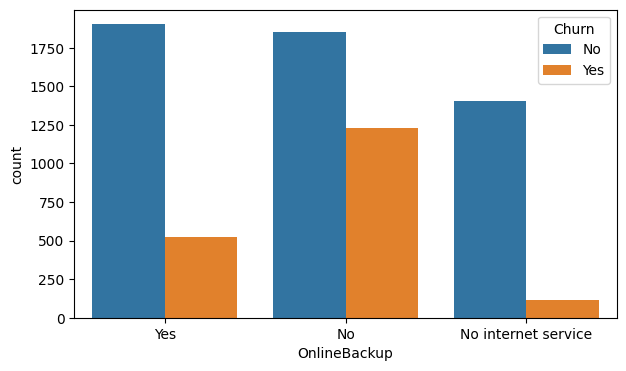

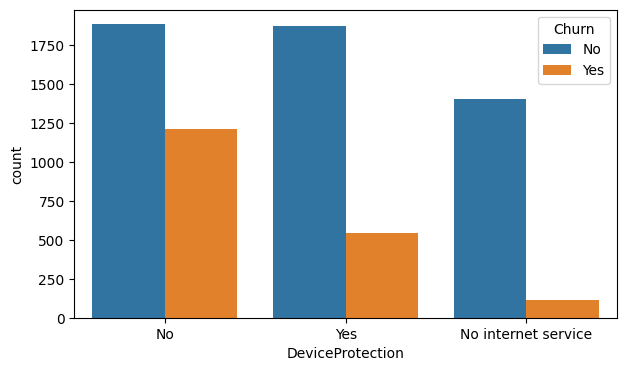

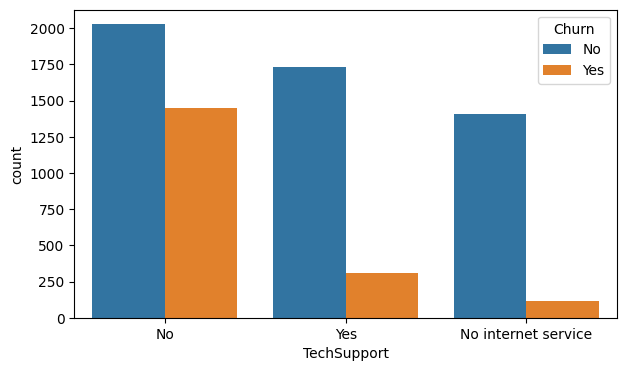

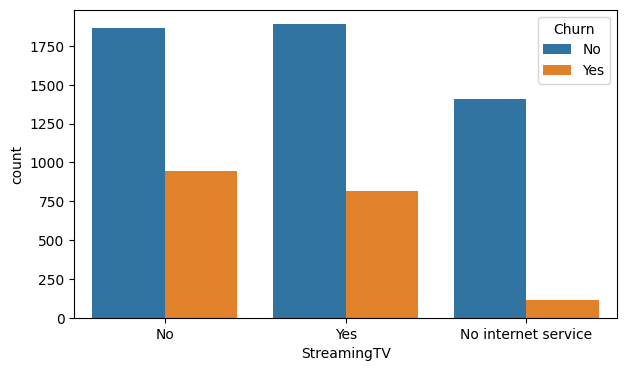

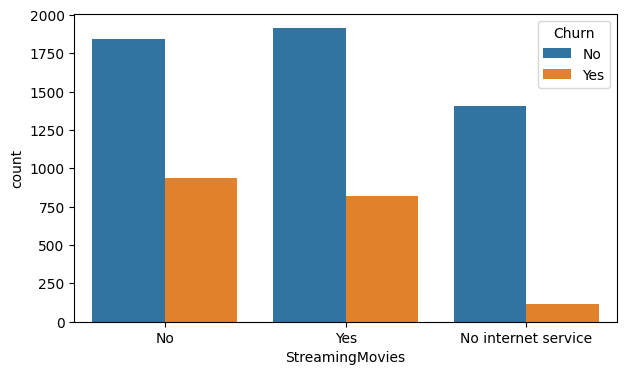

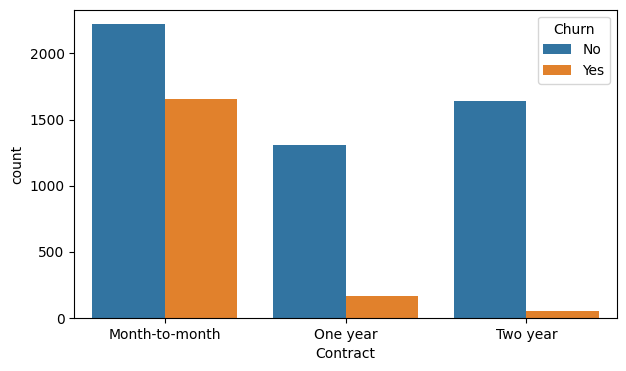

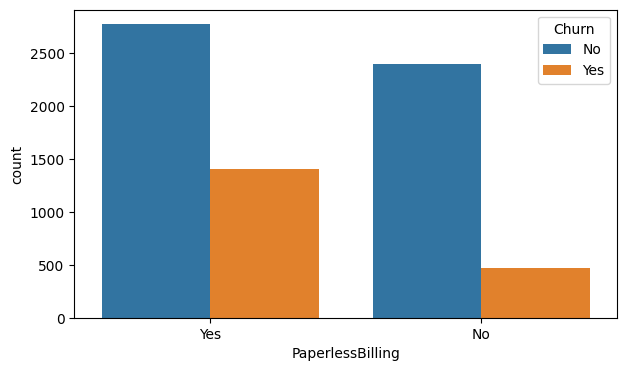

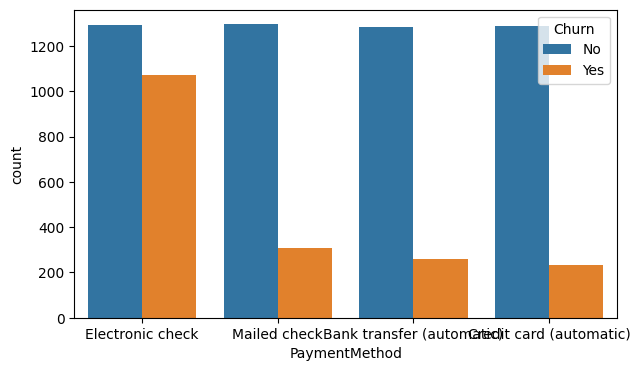

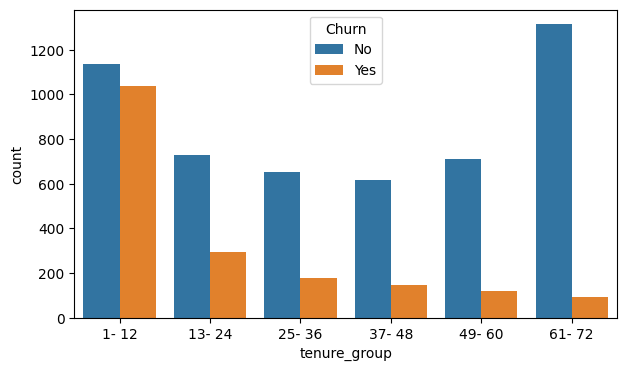

In [35]:
# plotting the gragh for each col. w.r.t to chrun col
num_col = ['MonthlyCharges','TotalCharges', 'Churn']
for i , predictor in enumerate(new_df.drop(columns = num_col)):
    plt.figure(i, figsize = (7,4
                            ))
    sns.countplot(data = new_df, x = predictor, hue ='Churn')

#### Insights:
1. Almost 42% Seniorcitizens churned.
2. 35% non-partner's churned.
3. 30% non-dependents churned.
4. 425 people who use fibre optics as internet service churned.
5. Those are using Electronic check as a mode of payment churned.
6. People in the tenure of 1-12 months are more likely to churn.

#### Numerical analysis

In [36]:
new_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
# Mapping the target column value to 0 & 1.
new_df['Churn'] = new_df['Churn'].map({"No" : 0, "Yes" : 1})

In [38]:
# Converting all the categorical cols to numeric.
new_df_num = pd.get_dummies(new_df)

In [39]:
new_df_num

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1- 12,tenure_group_13- 24,tenure_group_25- 36,tenure_group_37- 48,tenure_group_49- 60,tenure_group_61- 72
0,29.85,29.85,0,True,False,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,56.95,1889.50,0,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,53.85,108.15,1,False,True,True,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,42.30,1840.75,0,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,70.70,151.65,1,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,False,True,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7039,103.20,7362.90,0,True,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7040,29.60,346.45,0,True,False,True,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
7041,74.40,306.60,1,False,True,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,False


In [40]:
# Ploting a kernal density plot for the between the numeric columns and target varible

C:\Users\Harshit\AppData\Local\Temp\ipykernel_14584\3578538971.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_num.MonthlyCharges[(new_df_num["Churn"] == 0) ],
C:\Users\Harshit\AppData\Local\Temp\ipykernel_14584\3578538971.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_num.MonthlyCharges[(new_df_num["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

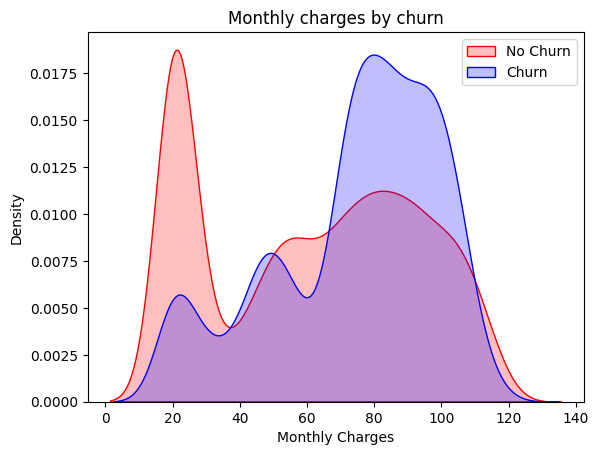

In [42]:
Mth = sns.kdeplot(new_df_num.MonthlyCharges[(new_df_num["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(new_df_num.MonthlyCharges[(new_df_num["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

#### For higher monthly charges more will be the churners.

C:\Users\Harshit\AppData\Local\Temp\ipykernel_14584\3613474281.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tth = sns.kdeplot(new_df_num.TotalCharges[(new_df_num["Churn"] == 0) ],
C:\Users\Harshit\AppData\Local\Temp\ipykernel_14584\3613474281.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tth = sns.kdeplot(new_df_num.TotalCharges[(new_df_num["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

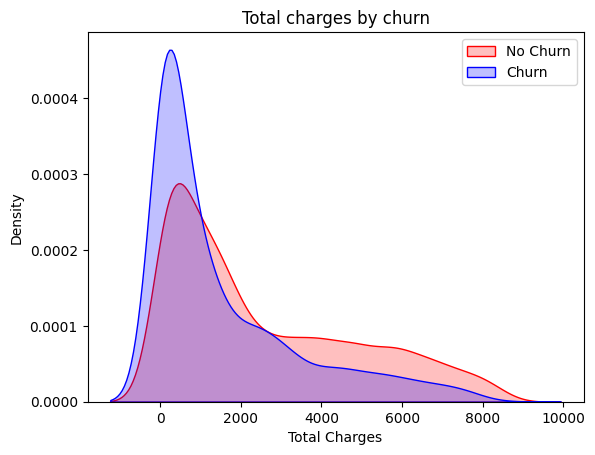

In [43]:
tth = sns.kdeplot(new_df_num.TotalCharges[(new_df_num["Churn"] == 0) ],
                color="Red", shade = True)
tth = sns.kdeplot(new_df_num.TotalCharges[(new_df_num["Churn"] == 1) ],
                ax =tth, color="Blue", shade= True)
tth.legend(["No Churn","Churn"],loc='upper right')
tth.set_ylabel('Density')
tth.set_xlabel('Total Charges')
tth.set_title('Total charges by churn')

Surperisingly for lower total charges there are high no of churners. Total charges means times monthly charges paid in a one complete tenure. For e.g. if monthly charges are high and the tenure is smaller then evetually totalcharges will become lower if we compare with same amount of monthly charges paid for a long tenure.
So the possible reason might be people paying higher monthly chargers for smaller tenure are more likey churn. 

<Axes: >

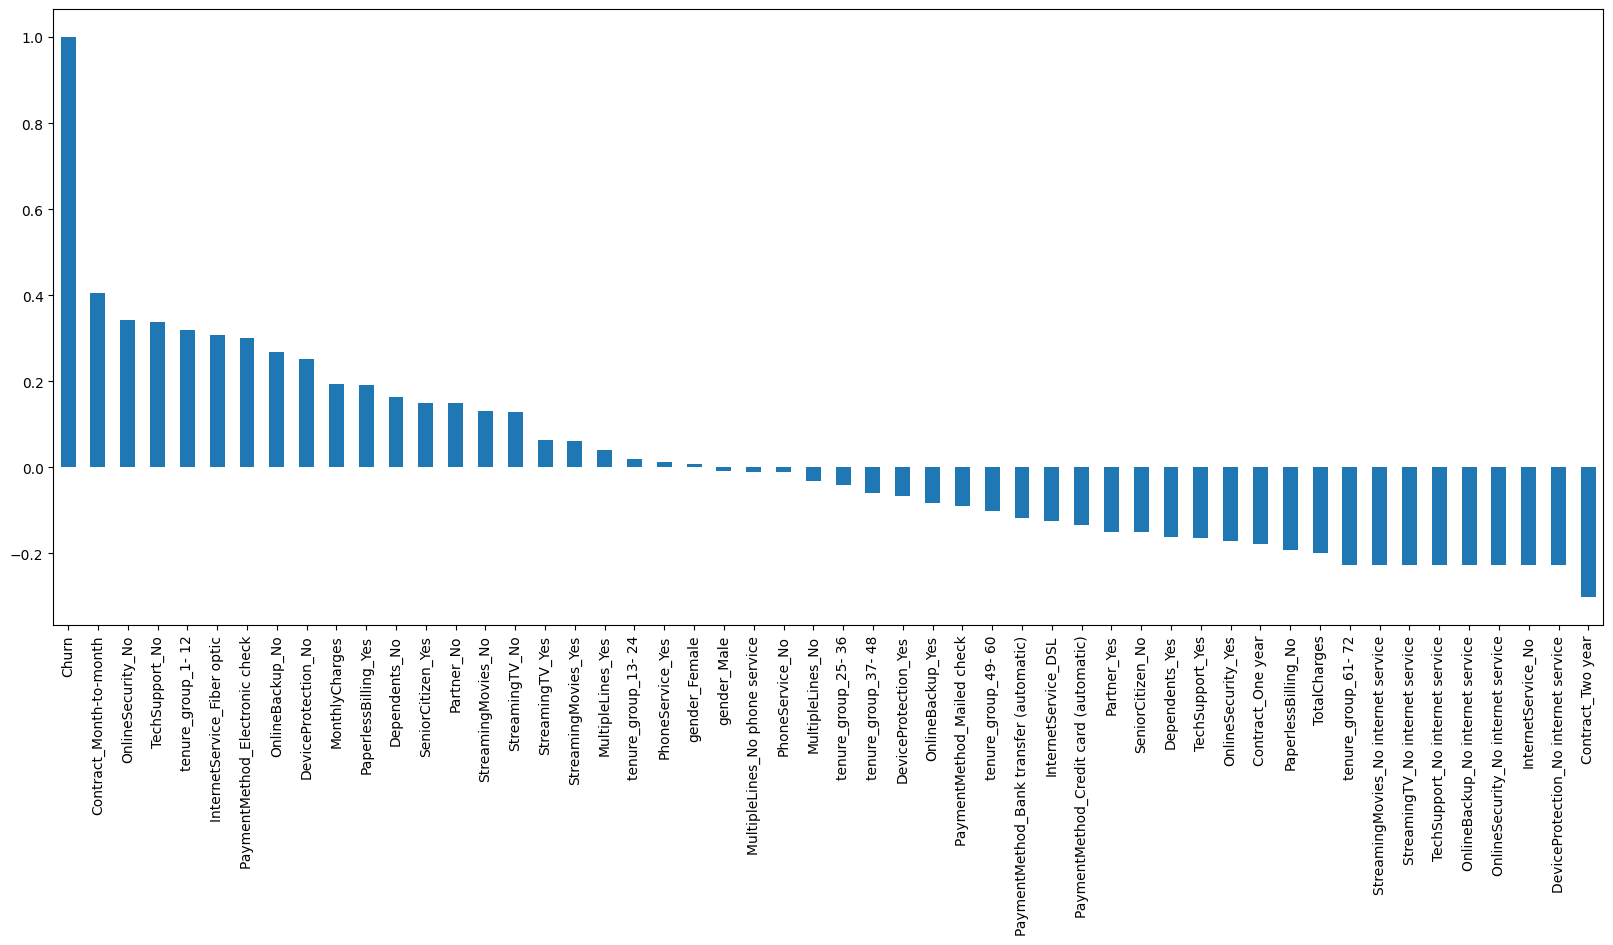

In [44]:
plt.figure(figsize = (20,8))
new_df_num.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

### Bivariate Analysis

1. In Bivariate analysis we preform the vizualization on two columns. 
2. Our dataframe has 20 columns, if we rank the first col as 1, second col as 2 and so on. Then the possible combinations for columns to analyze are (1,2), (1,3), (1,4).....(20,19),(20,20).
3. We are free to choose any combinations of our choice. But choosing those columns which provide us insights during the univariate analysis can give us more insights.
4. For e.g. SeniorCitizen gives us a insight in univariate analysis so we can take the combination like (SeniorCitizen, gender). And many more such combinations.

In [88]:
new_df.shape

(7032, 20)

In [89]:
churn_yes = new_df.loc[new_df['Churn'] == 1]

In [90]:
churn_yes['gender'].value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

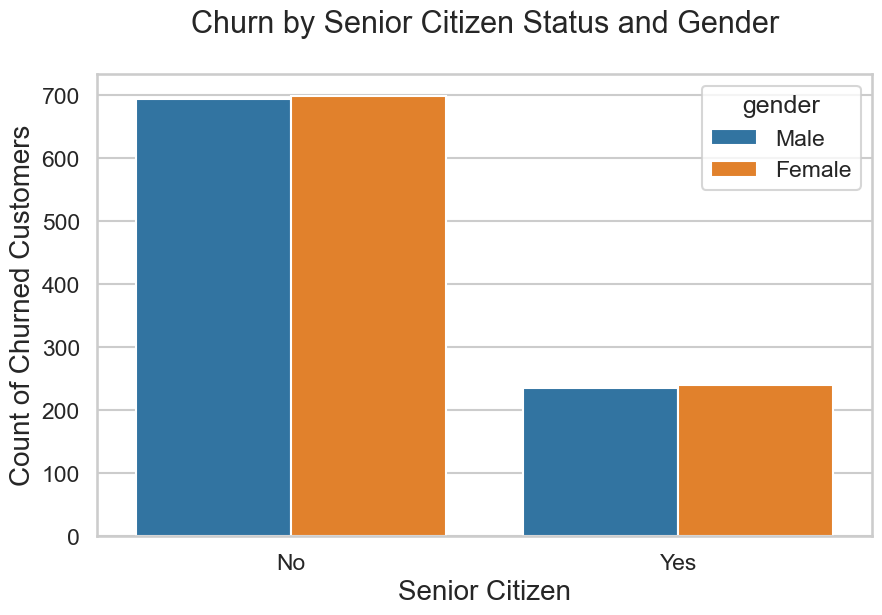

In [91]:
def bivariate_plot(dataframe, column1, column2, size):
    plt.figure(figsize = size)
    sns.countplot(data = dataframe, x = column1, hue = column2)
    plt.title('Churn by Senior Citizen Status and Gender')
    plt.ylabel('Count of Churned Customers')
    plt.xlabel('Senior Citizen')
    plt.show()
bivariate_plot(churn_yes, 'SeniorCitizen', 'gender', (10,6))

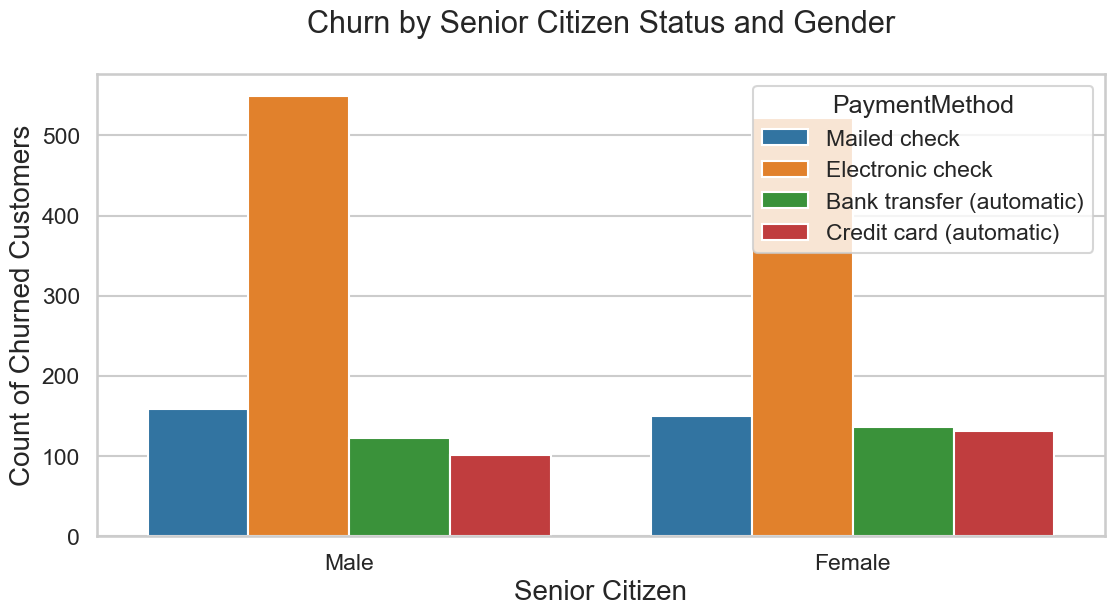

In [94]:
bivariate_plot(churn_yes, 'gender', 'PaymentMethod', (13,6))